<h1><center>Plan</center></h1>

| <h2>Classification</h2> | <h2>Regression</h2> | <h2>Clustering</h2> |
| :- | :- | :- |
| Neural network (MLP) DONE | Decision tree (LightGBM) DONE | PCA and k-means DONE |
| Decision tree (LightGBM) DONE | Neural network (MLP) DONE |  |
| kNN DONE| kNN DONE |  |



# Load the training data

In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')

#only consider actual electrons
electrons = train[train['Truth'] == True]

all_variables = [
        'actualInteractionsPerCrossing', 'averageInteractionsPerCrossing',
        'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu',
        'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track',
        'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0',
        'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster',
        'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster',
        'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2',
        'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2',
        'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo',
        'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster',
        'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3',
        'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad',
        'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID',
        'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits',
        'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits',
        'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack',
        'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG',
        'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG',
        'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG',
        'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1',
        'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0',
        'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1',
        'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement',
        'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3',
        'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore',
        'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core',
        'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time',
        'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG',
        'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG',
        'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG',
        'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG',
        'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7',
        'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset',
        'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo',
        'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection',
        'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1',
        'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1',
        'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0',
        'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1',
        'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1',
        'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1'
    ]

train_variables = electrons[all_variables]
train_energy = electrons['p_truth_E']
train_class = electrons['Truth']

#scale data
transformer = RobustScaler().fit(train_variables)
train_variables = pd.DataFrame(transformer.transform(train_variables), columns=train_variables.columns
)

# Regression

### Decision tree (LightGBM)

In [3]:
#define model
import lightgbm as lgb
reg = lgb.LGBMRegressor(objective='regression', metric='mape', force_col_wise=True)

In [4]:
#define error function
def mape(pred, true):
    diffs = abs((true-pred)/true)
    
    return (sum(diffs))/len(pred)

In [5]:
#split data intro training and validation
x_train, x_val, y_train, y_val = train_test_split(train_variables, train_energy, test_size=0.3, random_state=42)

In [6]:
#hyperparameter search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

search_params = {'num_leaves':randint(1,150), 'max_depth':randint(1,50), 'min_child_samples':randint(1,100)}

random_search = RandomizedSearchCV(reg, search_params, n_iter=60, cv=2, return_train_score=True, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

print('Best parameters: ', random_search.best_params_ , 'Best score: ', random_search.best_score_)

In [7]:
#train optimized model
reg_opt = lgb.LGBMRegressor(objective='regression', metric='mape', force_col_wise=True, num_leaves=33, max_depth=35, min_child_samples=35)
reg_opt.fit(x_train, y_train)
y_pred = reg_opt.predict(x_val)
error = mape(y_pred, y_val)
print('LightGBM Model MAPE:',error)

LightGBM Model MAPE: 0.0681402161587954


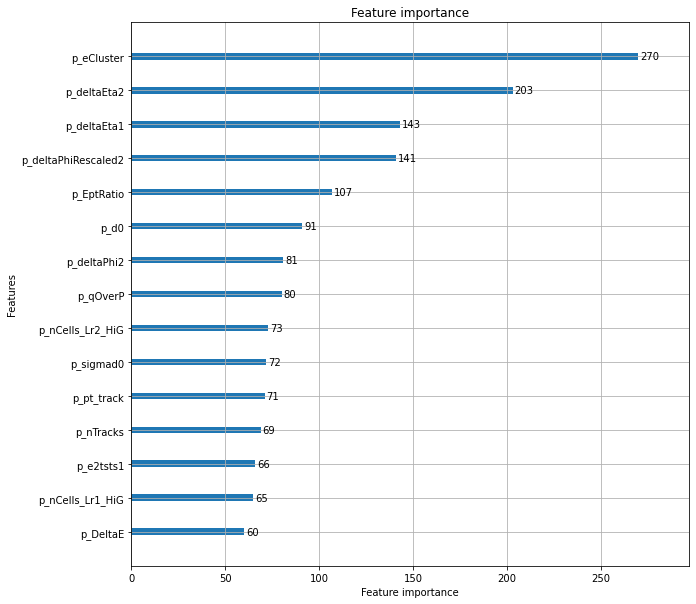

In [8]:
#Built in feature importance (best 15 features)
ax = lgb.plot_importance(reg_opt, max_num_features=15, figsize=(10,10))
plt.show()

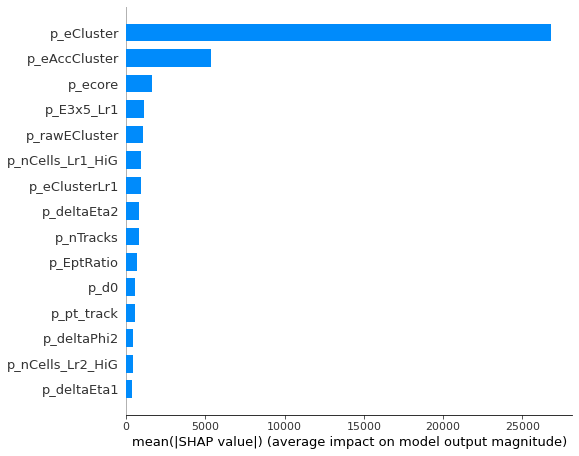

In [8]:
#feature importance using SHAP (best 15 variables)
import shap
explainer = shap.TreeExplainer(reg_opt)
shap_values = explainer.shap_values(x_val)
shap.summary_plot(shap_values, x_val, plot_type="bar", max_display=15)

In [ ]:
#get list of 15 best feature names (from SHAP)
vals = np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(x_train.columns, vals)), columns=['Feature name','Feature importance'])
feature_importance.sort_values(by=['Feature importance'], ascending=False,inplace=True)
best_features = list(feature_importance['Feature name'][:15])

In [11]:
#define new train variables after feature importance
opt_train_variables = electrons[best_features]
x_train_opt, x_val_opt, y_train_opt, y_val_opt = train_test_split(opt_train_variables, train_energy, test_size=0.3, random_state=42)

In [12]:
#hyperparameter search w/ only 15 features
search_params = {'num_leaves':randint(1,150), 'max_depth':randint(1,50), 'min_child_samples':randint(1,100)}

random_search = RandomizedSearchCV(reg_opt, search_params, n_iter=60, cv=2, return_train_score=True, random_state=42)
random_search.fit(x_train_opt, y_train_opt)

print('Best parameters: ', random_search.best_params_ , 'Best score: ', random_search.best_score_)

In [13]:
#get validation accuracy on final optimized model
reg_opt_opt = lgb.LGBMRegressor(objective='regression', metric='mape', force_col_wise=True, num_leaves=15, max_depth=31, min_child_samples=48)
reg_opt_opt.fit(x_train_opt, y_train_opt)
y_pred=reg_opt_opt.predict(x_val_opt)
error = mape(y_pred, y_val)
print('LightGBM Model MAPE:',error)

LightGBM Model MAPE: 0.07083127486173846


# Test data

In [14]:
#load test set
test = load_data('test')
test_variables = test[best_features]

#scale test data
transformer = RobustScaler().fit(test_variables)
test_variables = pd.DataFrame(transformer.transform(test_variables), columns=test_variables.columns
)

In [17]:
#use model on test data
y_pred = pd.DataFrame(reg_opt_opt.predict(test_variables))

#export to csv
# y_pred.to_csv('predicted_energies_lightGBM.csv', header=False)